In [171]:
import pyvista as vtki
import vtk as vtk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
## grid is the central object in VTK where every field is added on to grid
grid = vtki.UnstructuredGrid('./VTK/c1_500.vtk')
geom = vtki.Arrow()
#glyphs = grid.glyph(orient="vectors", scale="scalars", factor=0.005, geom=geom)

In [170]:
#grid.set_active_points

AttributeError: 'UnstructuredGrid' object has no attribute 'set_active_points'

In [172]:
a=grid.cell_arrays['U'][:,2]


In [183]:
vectors = np.vstack(
(
grid.cell_arrays['U'][:,0],
grid.cell_arrays['U'][:,1]
#grid.cell_arrays['U'][:,2]
)
)
a=vtki.PolyData(grid.points,vectors)
#a=a.cell_centers(vertex=True)

In [162]:
from matplotlib.colors import ListedColormap
p=vtki.BackgroundPlotter()
#p=vtki.Plotter()
#glyphs=a.glyph(orient="vectors", scale="scalars", factor=0.005, geom=geom)
glyphs = grid.glyph(orient="U", scale="p_mean", factor=0.005, geom=geom)
#glyphs=a.glyph(orient=True, scale=True,factor=0.2,geom=geom)
p.add_mesh(glyphs,cmap=boring_cmap)
#p.add_mesh(grid)

p.show()

RuntimeError: Data field (None) not useable

In [72]:
## point-wise information of geometry is contained
print(grid.points)



[[  0.707107     0.707107    -0.5       ]
 [  0.7560176    0.7560176   -0.5       ]
 [  0.80674547   0.80674547  -0.5       ]
 ...
 [ -0.21559761 -17.535067     0.5       ]
 [ -0.21392292 -18.726198     0.5       ]
 [ -0.212132   -20.           0.5       ]]


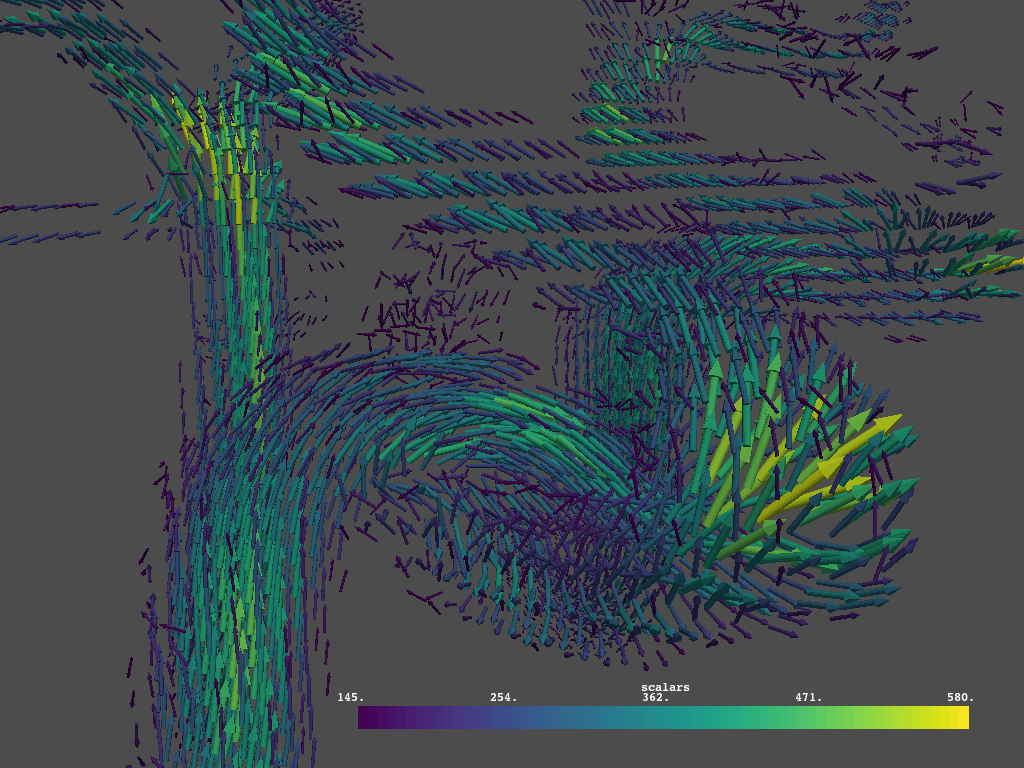

In [173]:
from pyvista import examples

mesh = examples.download_carotid().threshold(145, scalars="scalars")

# Make a geometric obhect to use as the glyph
geom = vtki.Arrow()  # This could be any dataset

# Perform the glyph
glyphs = mesh.glyph(orient="vectors", scale="scalars", factor=0.005, geom=geom)

# plot using the plotting class
p = vtki.Plotter()
p.add_mesh(glyphs)
# Set a cool camera position
p.camera_position = [
    (84.58052237950857, 77.76332116787425, 27.208569926456548),
    (131.39486171068918, 99.871379394528, 20.082859824932008),
    (0.13483731007732908, 0.033663777790747404, 0.9902957385932576),
]
p.show()

KeyError: 1

In [156]:
grid

UnstructuredGrid (0x7fe0075af588)
  N Cells:	9200
  N Points:	18840
  X Bounds:	-2.000e+01, 3.000e+01
  Y Bounds:	-2.000e+01, 2.000e+01
  Z Bounds:	-5.000e-01, 5.000e-01
  N Arrays:	15

In [7]:
## get a dictionary contains all cell/point information
print(grid.cell_arrays) # note that cell-based and point-based are in different size


{'cellID': array([   0,    1,    2, ..., 9197, 9198, 9199], dtype=int32), 'pMean': array([-3.9010429e-01, -3.8476455e-01, -3.7721464e-01, ...,
        4.7097772e-05,  5.0310505e-04,  7.8981160e-04], dtype=float32), 'p': array([-0.2637219 , -0.26285246, -0.26089546, ..., -0.01250673,
       -0.01188275, -0.01148415], dtype=float32), 'pPrime2Mean': array([0.35802364, 0.30969888, 0.25894952, ..., 0.0069858 , 0.00697189,
       0.00696346], dtype=float32), 'U': array([[-1.5920468e-02,  1.2847723e-02, -1.6083467e-20],
       [-3.6142282e-02,  3.0057866e-02,  1.3591901e-20],
       [-4.2043488e-02,  4.1902896e-02, -1.0399350e-20],
       ...,
       [ 1.0276544e+00, -4.4414513e-03, -3.2185433e-23],
       [ 1.0266306e+00, -2.7128891e-03, -6.0221265e-21],
       [ 1.0259647e+00, -8.6135051e-04,  3.0369975e-21]], dtype=float32), 'U_0': array([[-1.5913971e-02,  1.2840493e-02, -1.6054424e-20],
       [-3.6137152e-02,  3.0054497e-02,  1.3621156e-20],
       [-4.2035922e-02,  4.1916139e-02, -1.039

In [8]:
print(grid.point_arrays) # 

{'pMean': array([-0.38796094, -0.38509   , -0.37848544, ...,  0.00046686,
        0.00082938,  0.00097078], dtype=float32), 'p': array([-0.26326463, -0.26275095, -0.2613119 , ..., -0.01197205,
       -0.01147333, -0.01127678], dtype=float32), 'pPrime2Mean': array([0.39325783, 0.36687273, 0.31261325, ..., 0.00709744, 0.00708182,
       0.00707586], dtype=float32), 'U': array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-2.4502147e-02,  2.3916231e-02,  5.4354462e-21],
       [-3.7825551e-02,  4.2324252e-02,  3.0730452e-21],
       ...,
       [ 1.0269797e+00, -3.6630498e-03, -2.0185265e-21],
       [ 1.0261443e+00, -1.8389408e-03,  1.4271846e-21],
       [ 1.0258106e+00,  0.0000000e+00,  4.4957024e-21]], dtype=float32), 'U_0': array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-2.4496909e-02,  2.3918591e-02,  5.4628074e-21],
       [-3.7818890e-02,  4.2347703e-02,  3.0955944e-21],
       ...,
       [ 1.0269556e+00, -3.6574686e-03, -2.0173206e-21],
       [ 1.

In [178]:
grid.cell_arrays['p']

array([-0.2637219 , -0.26285246, -0.26089546, ..., -0.01250673,
       -0.01188275, -0.01148415], dtype=float32)

In [10]:

## create a new cell field of pressure^2
p2_cell = p_cell**2
grid._add_cell_scalar(p2_cell, 'p2')

/home/frederik/anaconda3/lib/python3.7/site-packages/pyvista/core/common.py:921: RuntimeWarning: Deprecation Warning: `_add_cell_scalar` is now `_add_cell_array`
  warnings.warn('Deprecation Warning: `_add_cell_scalar` is now `_add_cell_array`', RuntimeWarning)


In [12]:
## remember to save the modified vtk
grid.save('./VTK/c1_500_shaowu.vtk')

1

In [19]:
reader = vtki.UnstructuredGridReader()
reader.SetFileName(myFileName)
reader.Update()

AttributeError: module 'pyvista' has no attribute 'UnstructuredGridReader'